In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sys, os

# Helpers
abspath = os.path.abspath
dirname = os.path.dirname
sep = os.sep

# Update sys.path for in-house libraries
folder_ = dirname(abspath(os.getcwd()))
for i in range(1): folder_ = dirname(folder_)
sys.path.append(folder_)

# In-house libraries
import src.utils.mining_data_tb as md
import src.utils.visualization_tb as vi
import src.utils.folder_tb as fo

In [3]:
# Data path
data_path = fo.path_to_folder(2, "data" + sep + "health")
variables_data_path = data_path + "6_variables" + sep + "0_final_variables.csv"
# Folders where the info is
folders = ["1_demographics", "2_dietary", "3_examination", "4_laboratory", "5_questionnaire"]
# To correct duplicated columns
columns_correction = {
            "WTDRD1_x" : "WTDRD1",
            "WTDR2D_x" : "WTDR2D",
            "DRABF_x" : "DRABF",
            "DRDINT_x" : "DRDINT",
            "WTSAF2YR_x" : "WTSAF2YR",
            "LBXHCT_x" : "LBXHCT"
        }

# Objects to load the data
dataset = md.dataset()
vardata = md.variables_data()
# Loading data
dataset.load_data(data_path, folders, columns_correction)
vardata.load_data(variables_data_path)
dataset.df

,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,SMQ690F,SMQ830,SMQ840,SMDANY,SMAQUEX,SMQ690I,SMQ857,SMQ690J,SMQ861,MCQ160H
SEQN,,,,,,,,,,,,,,,,,,,,,
83732,9,2,1,62,NaN,3,3,1.0,NaN,2.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0
83733,9,2,1,53,NaN,3,3,1.0,NaN,2.0,...,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,0
83734,9,2,1,78,NaN,3,3,2.0,NaN,1.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1
83735,9,2,2,56,NaN,3,3,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0
83736,9,2,2,42,NaN,4,4,2.0,NaN,2.0,...,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102952,10,2,2,70,NaN,5,6,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0
102953,10,2,1,42,NaN,1,1,2.0,NaN,2.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0
102954,10,2,2,41,NaN,4,4,1.0,NaN,2.0,...,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,0


In [4]:
vardata.df

,vAr_nAmE,var_descr,file_name,file_descr,start_year,end_year,component,constraint
id,,,,,,,,
28,RIAGENDR,Gender of the participant.,DEMO_J,Demographic Variables and Sample Weights,2017,2018,Demographics,None
0,AIALANGA,Language of the MEC ACASI Interview Instrument,DEMO_J,Demographic Variables and Sample Weights,2017,2018,Demographics,None
1,DMDBORN4,In what country {were you/was SP} born?,DEMO_J,Demographic Variables and Sample Weights,2017,2018,Demographics,None
2,DMDCITZN,{Are you/Is SP} a citizen of the United States...,DEMO_J,Demographic Variables and Sample Weights,2017,2018,Demographics,None
3,DMDEDUC2,What is the highest grade or level of school {...,DEMO_J,Demographic Variables and Sample Weights,2017,2018,Demographics,None
...,...,...,...,...,...,...,...,...
1086,VTQ271A,"In the last 48 hours, did {you/she/he} take a ...",VTQ_J,Volatile Toxicant,2017,2018,Questionnaire,None
1087,VTQ281A,"In the last 48 hours, did {you/she/he} breathe...",VTQ_J,Volatile Toxicant,2017,2018,Questionnaire,None
1088,VTQ281C,"In the last 48 hours, did {you/she/he} breathe...",VTQ_J,Volatile Toxicant,2017,2018,Questionnaire,None


In [13]:
dataset.reset_dataset()
# We'll keep just the interesting columns
features = ["MCQ160H", "RIAGENDR", "RIDAGEYR", "DR1TCHOL", "DR1TTFAT", "DR1TSFAT", "DR1TSUGR", "DR2TCHOL", "DR2TTFAT", "DR2TSFAT", "DR2TSUGR", "BPXDI1", "BPXSY1", "BMXWT", "BMXWAIST", "LBXTC", "LBXSGL", "DR1TFIBE", "DR1TVB6", "DR2TFIBE", "DR2TVB6"]
dataset.filter_columns(features, inplace = True)

# Load variables' descriptions we will use
features_names = vardata.vars_descr_detector(features, 40, True)

# Remove NaNs
dataset.drop_nans()

# Measures that are the same taken in two different days, will be combined into one column using mean
comb1 = [["DR1TCHOL", "DR2TCHOL"], "MEANCHOL"]
comb2 = [["DR1TTFAT", "DR2TTFAT"], "MEANTFAT"]
comb3 = [["DR1TSFAT", "DR2TSFAT"], "MEANSFAT"]
comb4 = [["DR1TSUGR", "DR2TSUGR"], "MEANSUGR"]
comb5 = [["DR1TFIBE", "DR2TFIBE"], "MEANFIBE"]
comb6 = [["DR1TVB6", "DR2TVB6"], "MEANTVB6"]
combs = [comb1, comb2, comb3, comb4, comb5, comb6]

dataset.pairs_mean(combs, drop_old = True)

dataset.df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13446 entries, 83732 to 102956
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MCQ160H   13446 non-null  int64  
 1   RIAGENDR  13446 non-null  int64  
 2   RIDAGEYR  13446 non-null  int64  
 3   BPXDI1    13446 non-null  float64
 4   BPXSY1    13446 non-null  float64
 5   BMXWT     13446 non-null  float64
 6   BMXWAIST  13446 non-null  float64
 7   LBXTC     13446 non-null  float64
 8   LBXSGL    13446 non-null  float64
 9   MEANCHOL  13446 non-null  float64
 10  MEANTFAT  13446 non-null  float64
 11  MEANSFAT  13446 non-null  float64
 12  MEANSUGR  13446 non-null  float64
 13  MEANFIBE  13446 non-null  float64
 14  MEANTVB6  13446 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 1.6 MB


In [17]:
pd.read_csv(data_path + "7_cleaned_data" + sep + "cleaned_data.csv", index_col = 0)

,MCQ160H,RIDAGEYR,BPXDI1,BPXSY1,BMXWT,BMXWAIST,LBXTC,LBXSGL,MEANCHOL,MEANTFAT,MEANSFAT,MEANSUGR,MEANFIBE,MEANTVB6,Female,Male
SEQN,,,,,,,,,,,,,,,,
83732,0,62,70.0,128.0,94.8,101.1,173.0,94.0,386.5,100.415,31.9250,80.355,19.75,2.7810,0,1
83733,0,53,88.0,146.0,90.4,107.9,265.0,94.0,590.0,116.230,29.3455,107.680,9.75,2.4455,0,1
83734,1,78,46.0,138.0,83.4,116.5,229.0,103.0,416.0,91.055,31.4755,78.690,26.25,2.4295,0,1
83736,0,42,70.0,100.0,55.2,80.4,204.0,83.0,138.5,35.255,13.2585,72.735,2.55,0.5000,1,0
83737,0,72,58.0,116.0,64.4,92.9,190.0,97.0,209.5,31.180,8.2280,23.150,14.00,1.6445,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102947,0,75,82.0,160.0,73.2,94.0,143.0,77.0,183.5,71.185,31.9130,70.580,12.70,0.7630,0,1
102952,0,70,74.0,136.0,49.0,82.2,119.0,150.0,49.0,31.015,7.0920,42.075,25.20,1.2990,1,0
102954,0,41,66.0,116.0,69.1,86.4,172.0,88.0,287.5,75.315,18.6470,78.390,10.30,2.1240,1,0


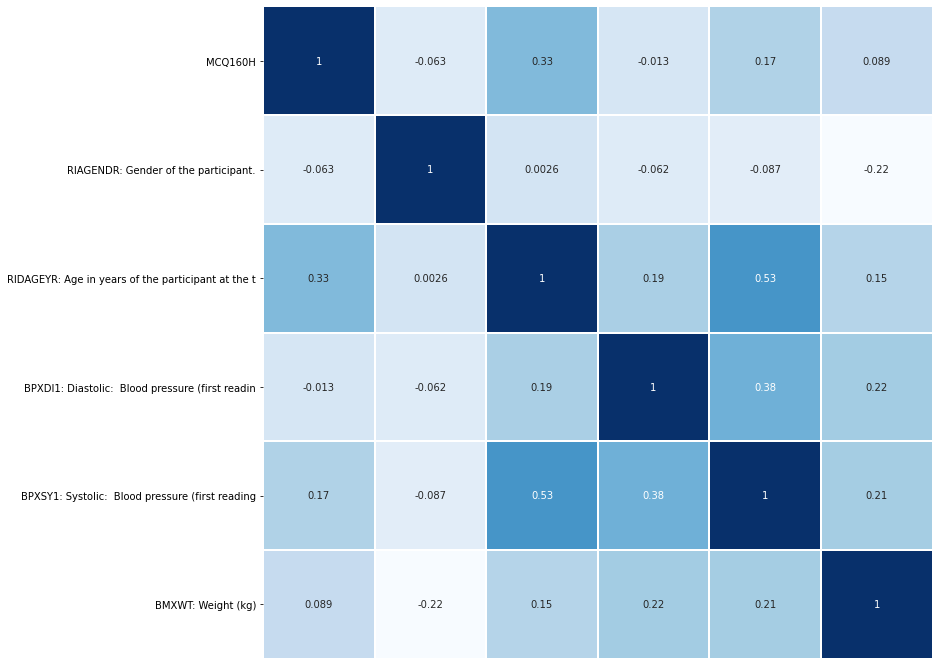

In [35]:
features_names_2 = vardata.vars_descr_detector(dataset.df.columns, 40, True)

plot = vi.eda_plotter
#fig = plot.multi_axes_plotter(dataset.df.iloc[:, :6], features_names, 3, "box", (12, 12))
fig = plot.correlation_matrix(dataset.df.iloc[:, :6], features_names_2[:6])

In [33]:
for ind, val in enumerate(features_names_2):
    print(f"{dataset.df.columns[ind]} <-> {val}")

MCQ160H <-> MCQ160H
RIAGENDR <-> RIAGENDR: Gender of the participant.
RIDAGEYR <-> RIDAGEYR: Age in years of the participant at the t
BPXDI1 <-> BPXDI1: Diastolic:  Blood pressure (first readin
BPXSY1 <-> BPXSY1: Systolic:  Blood pressure (first reading
BMXWT <-> BMXWT: Weight (kg)
BMXWAIST <-> BMXWAIST: Waist Circumference (cm)
LBXTC <-> LBXTC: Total Cholesterol (mg/dL)
LBXSGL <-> LBXSGL: Glucose, refrigerated serum (mg/dL)
MEANCHOL <-> MEANCHOL
MEANTFAT <-> MEANTFAT
MEANSFAT <-> MEANSFAT
MEANSUGR <-> MEANSUGR
MEANFIBE <-> MEANFIBE
MEANTVB6 <-> MEANTVB6


In [48]:
test = md.dataset()
test.load_data(data_path, folders, columns_correction)
test.df.MCQ160H.value_counts()

0.0    15043
1.0     1842
Name: MCQ160H, dtype: int64

In [51]:
test.df.MCQ160H.notna().sum()

16885